In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset 
data = pd.read_csv("Dataset .csv")
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [3]:
data.shape

(9551, 21)

**Data Exploration**

In [4]:
#checking the number of null values in all the coulumns
data.isnull().sum()         # here the cuisines have 9 null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
#Drop all rows which have the null values
data = data.dropna() 
data.shape

(9542, 21)

**TASK 1 (Restaurant reviews)**

**Analyze the text reviews to identify the most common positive and negative keywords**

In [6]:
#count the occurance of rating text
data1 = data["Rating text"].value_counts()
data1

Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64

In [7]:
#Map the 'Rating text' to positive and negative sentiments
sentiment_mapping = {
    'Excellent': 'Positive',
    'Very Good': 'Positive',
    'Good': 'Positive',
    'Average': 'Negative',
    'Poor': 'Negative',
    'Not rated' : 'Negative'
}
#Apply the sentiment mapping
data['Sentiment'] = data['Rating text'].map(sentiment_mapping)
#count the occurance of sentiment
sentiment_summary = data['Sentiment'].value_counts()
print(sentiment_summary)

Sentiment
Negative    6068
Positive    3474
Name: count, dtype: int64


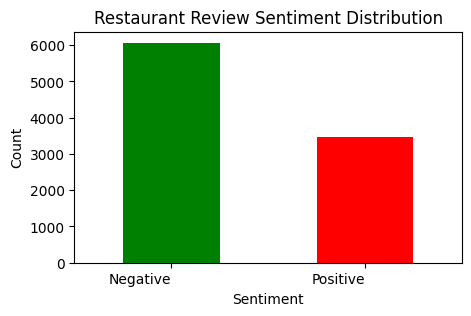

In [8]:
#plot the bar graph for the above
plt.figure(figsize = [5,3])
sentiment_summary.plot(kind='bar', color=['green', 'red'])
plt.title('Restaurant Review Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.show()

**Calculate the average length of review and explore if there is a relationship between review length and rating**

In [9]:
#calculate the ;ength of each review
data['Review Length'] = data['Rating text'].apply(len)
#calculate the average length of review
average_review_length = data['Review Length'].mean()
#display the average length of review
print(f"The average length of reviews is: {average_review_length:.2f} characters")

The average length of reviews is: 7.02 characters


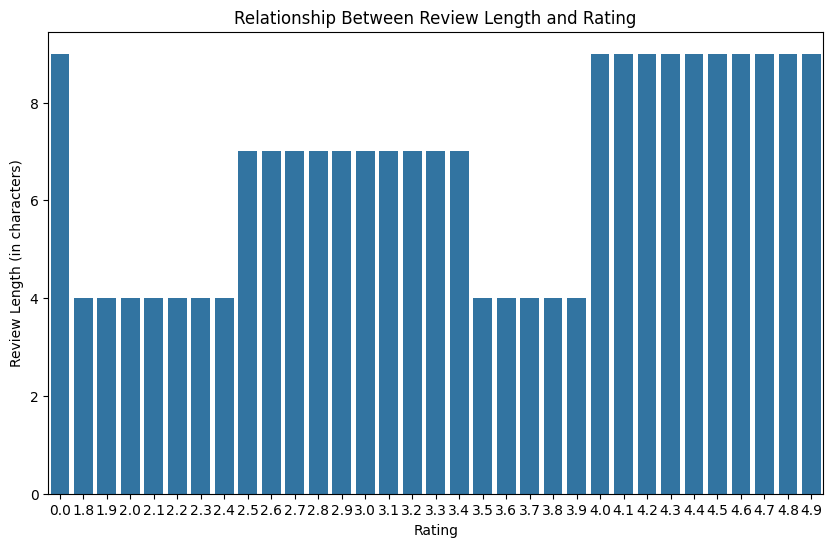

The correlation between review length and rating is: -0.48


In [10]:
#PLOT THE graph showing the relationship between review length and rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Aggregate rating', y='Review Length', data=data)
plt.title('Relationship Between Review Length and Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (in characters)')
plt.show()

# Calculate the correlation between review length and rating
correlation = data['Aggregate rating'].corr(data['Review Length'])
print(f"The correlation between review length and rating is: {correlation:.2f}")

**TASK 2 (Votes analysis)**

**Identify the restaurant with highest and lowest number of votes**

In [11]:
#calculate the maximium votes 
highest_vote  =data["Votes"].idxmax()
print("The highest vote is :- ", highest_vote)
#calcualte the minimum votes
lowest_vote  =data["Votes"].idxmin()
print("The lowest vote is :- ", lowest_vote)

The highest vote is :-  728
The lowest vote is :-  69


In [12]:
#calculate all the details according the label votes have maximum vote
highest_votes = data.loc[data["Votes"].idxmax()]
#calculate all the details according the label votes have minimum vote
lowest_votes = data.loc[data["Votes"].idxmin()]

In [13]:
#print the calculated vallue of highest vote
print(highest_votes)

Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                      No
Has Online delivery                   

In [14]:
#print the calculated value of lowest vote
print(lowest_votes)

Restaurant ID                                                     6710645
Restaurant Name                                          Cantinho da Gula
Country Code                                                           30
City                                                           S��o Paulo
Address                 Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...
Locality                                                       Itaim Bibi
Locality Verbose                                   Itaim Bibi, S��o Paulo
Longitude                                                      -46.675667
Latitude                                                          -23.581
Cuisines                                                        Brazilian
Average Cost for two                                                   55
Currency                                               Brazilian Real(R$)
Has Table booking                                                      No
Has Online delivery                   

**Anlyze if there is a correlation between the number of votes and rating of a restaurant**

In [15]:
#converting all the votes on to numeric value if there exist any
data["Votes"] = pd.to_numeric(data["Votes"])
#converting all the aggregate rating on to numeric value if there exist any
data["Aggregate rating"] = pd.to_numeric(data["Aggregate rating"])
#calculating the correlation between votes and aggregate raing
correlation = data["Votes"].corr(data["Aggregate rating"])
print("Correlation between number of votes and rating:", correlation)

Correlation between number of votes and rating: 0.3134741803250008


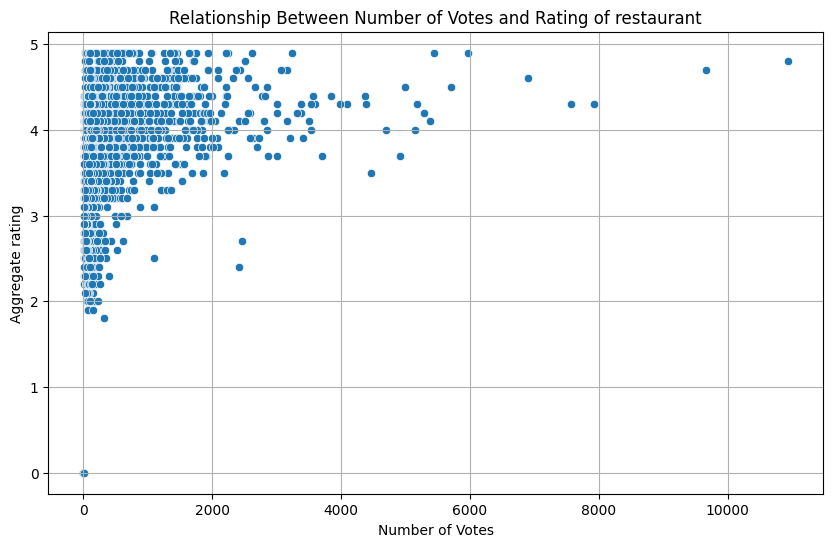

In [16]:
#plotiing the scatterplot of votes vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Votes'], y=data['Aggregate rating'], data=data)
plt.title('Relationship Between Number of Votes and Rating of restaurant')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate rating')
plt.grid()
plt.show()

**TASK 3 (Price range vs online delivery and table booking)**

**Analyze if there is a relationship between price range and availability of online delivery and table booking**

**Determine if higher price restaurant are more likely to offer these services**

In [17]:
#Analyzing the data using the cross tabulation
od_cross_tab = pd.crosstab(data['Price range'], data['Has Online delivery'])
tb_cross_tab = pd.crosstab(data['Price range'], data['Has Table booking'])
#displaying the online delivery data by the price range 
print("Online Delivery Cross-Tabulation:")
print(od_cross_tab)
print("\n"*1)
#Displaying the table booking data by the price range
print("Table Booking Cross-Tabulation:")
print(tb_cross_tab)

Online Delivery Cross-Tabulation:
Has Online delivery    No   Yes
Price range                    
1                    3737   701
2                    1827  1286
3                     994   411
4                     533    53


Table Booking Cross-Tabulation:
Has Table booking    No  Yes
Price range                 
1                  4437    1
2                  2874  239
3                   761  644
4                   312  274


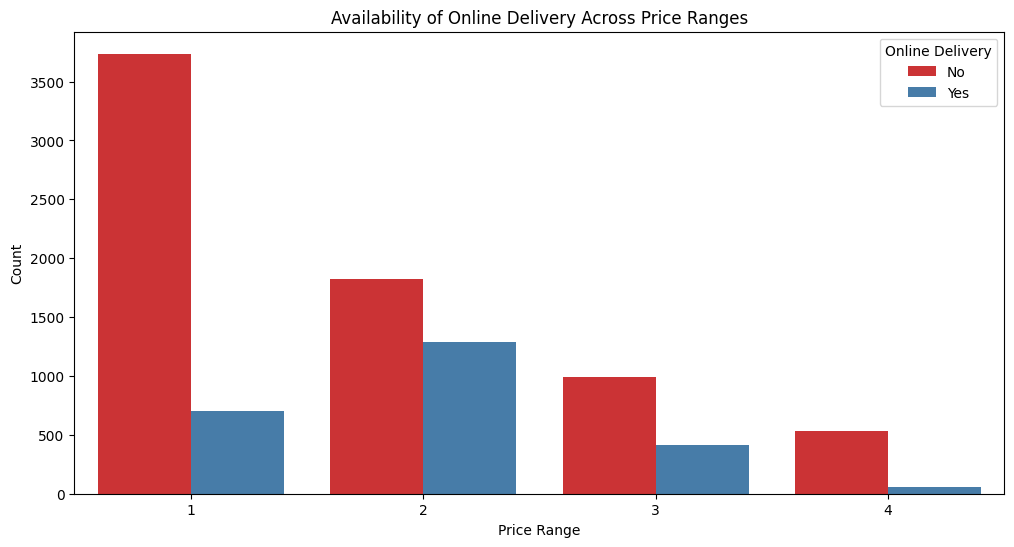

In [18]:
#visualize the online delivery vs price range in the countplot graph
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=data, palette='Set1')
plt.title('Availability of Online Delivery Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Online Delivery')
plt.show()

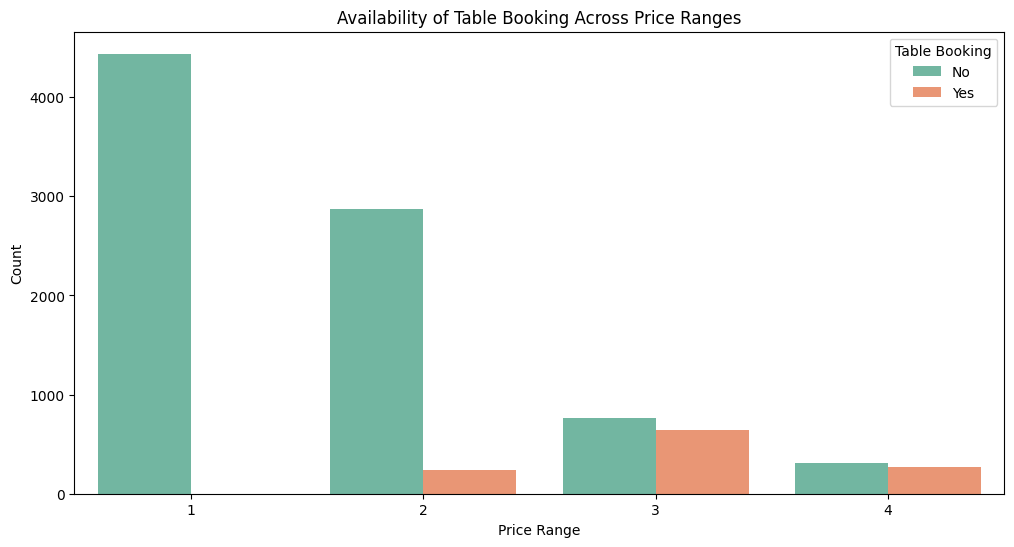

In [19]:
#visualize the online delivery vs price range in the countplot graph
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Table booking', data=data, palette='Set2')
plt.title('Availability of Table Booking Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Table Booking')
plt.show()